In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("../data/raw/vgsales.csv")

df.columns = df.columns.str.replace(" ","_").str.lower()

In [6]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df = df.dropna(subset=["year"]).copy()
df["year"] = df["year"].astype(int)


In [9]:
X = df[["year"]] # Feature
y = df["global_sales"]  # Target

Text(0.5, 1.0, 'Year vs Sales scatter Plot')

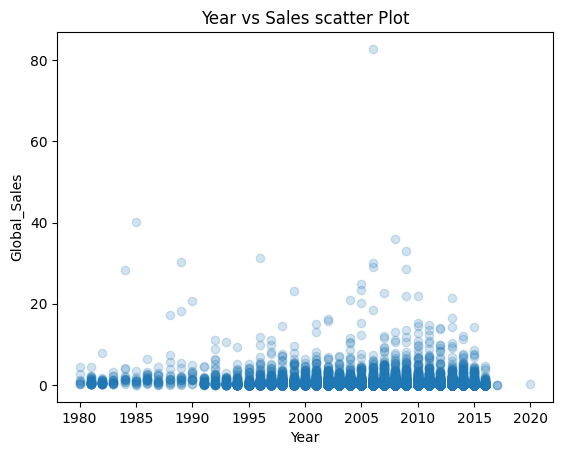

In [17]:
# Plot Raw Relationship

plt.scatter(X,y, alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.title("Year vs Sales scatter Plot")

### Observations

- This is not linear
- Sale is not increasing over time
- Variance is not constant 

In [19]:
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 40.81810425429465
Coefficient: -0.02007463286920487


In [20]:
'''What These Mean


prediction = b0 + b1 * year


Then:

b0 (intercept) = predicted sales when year = 0

b1 (coefficient) = change in predicted sales for 1 year increase

If coefficient = -0.02

It means:

Every additional year decreases predicted global sales by 0.02 million units.

That’s interpretation'''

'What These Mean\n\n\nprediction = b0 + b1 * year\n\n\nThen:\n\nb0 (intercept) = predicted sales when year = 0\n\nb1 (coefficient) = change in predicted sales for 1 year increase\n\nIf coefficient = -0.02\n\nIt means:\n\nEvery additional year decreases predicted global sales by 0.02 million units.\n\nThat’s interpretation'

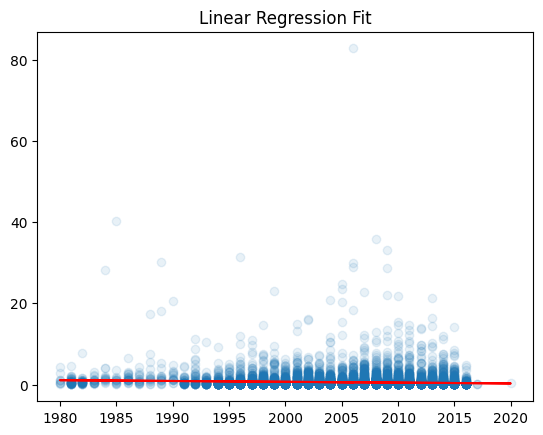

In [24]:
# Visualize Regression Line


y_pred = model.predict(X)
# Y_pred is predicted values of taget using X

plt.scatter(X, y, alpha=0.1)
plt.plot(X, y_pred, color="red")
plt.title("Linear Regression Fit")
plt.show()

In [25]:
# Lets Compute MSE Manually

errors = y - y_pred
squared_errors = errors ** 2
mse_manual = squared_errors.mean()

mse_manual

np.float64(2.4376746075661404)

In [26]:
# Compute MSE using sklearn

from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

2.4376746075661404

In [27]:
# Let's calculate root mean square error

rmse = np.sqrt(mse_manual)
rmse

np.float64(1.5613054177726216)

## R^2

In [28]:
# Manual compute

y_mean = y.mean()
ss_total = ((y - y_mean) ** 2).sum()
ss_residual = ((y - y_pred) ** 2).sum()

r2_manual = 1 - (ss_residual / ss_total)
r2_manual

np.float64(0.005585289974658014)

In [29]:
# Using SK learn

from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.005585289974658014

#### 0.005 R-Square means model only explains 0.5% of variations.
#### That's really weak

In [31]:
'''Now add:

platform

genre

Encode simply:'''

df_small = df[["year","platform","genre","global_sales"]].copy()
df_small = pd.get_dummies(df_small, columns=["platform","genre"], drop_first=True)

X = df_small.drop("global_sales", axis=1)
y = df_small["global_sales"]

model = LinearRegression()
model.fit(X, y)

print("Number of features:", len(model.coef_))

Number of features: 42


What Does a Categorical Coefficient Mean?

If:

platform_PS2 coefficient = 0.3


It means:

Games on PS2 sell 0.3 million more than baseline platform, all else equal.

That’s powerful.

Why Random Forest Works Better

Linear Regression assumes:

Straight-line relationship.

Random Forest assumes:

Sales behavior differs by region, platform, year nonlinearly.

Example mental model:

IF platform = Wii AND genre = Sports → high sales
IF platform = PC AND genre = Strategy → moderate


Trees capture this.

#### Feature Importance Meaning

Random Forest feature importance:

Is: How much each feature reduces prediction error across trees.

Important:

- It does NOT mean causation.

- It does NOT mean real-world importance.

- It means predictive usefulness.

#### Section 7 — Bias vs Variance

If model is too simple (Linear Regression):

- High bias

- Underfitting

If model too complex:

- High variance

- Overfitting

### 🔥 Reflection Section (Write This Seriously)



What does the intercept mean in our model?
- Intercept mean what does the target value be when feature value is 0

What does a negative coefficient for year imply?
- negative correlation, if year increase then global sale will increase

Why is R² small even if model “runs fine”?
- Model explains low reltionship between target and feature.

Why does Random Forest outperform Linear Regression?
- Because radom forest capture decision bias using each node.

What does feature importance NOT mean?
- It doesn't mean caution and real-world importance

